# ResNet

<div style="display: flex; align-items: center;">
    <img src="../imgs/ResNet.jpg" alt="Your Image" width="500" style="margin-right: 20px;">
    <div>
        <p>In chapter 7, we introduced a new dataset CIFAR, and tried to challenge it, but the result is limited by using the current knowledge we had learned. In the following chapters, we will aim to achieve a accuracy with 95% on both CIFAR10 and CIFAR100 and continuously introduce new models. In this chapter, we will introduce ResNet.</p>
        <p>From experience, the depth of the network is crucial to the performance of the model. When the number of network layers is increased, the network can extract more complex feature patterns, so theoretically, better results can be achieved when the model is deeper. But will deeper networks necessarily have better performance? As the depth of the network increases, the accuracy of the network saturates or even decreases.
</p>
        <p>The degradation problem of deep networks at least indicates that deep networks are not easy to train. Residual learning solves the problem of difficult training and even degradation of networks, making it easier to learn the original features directly compared to residual learning. When the residual is 0, the stacked layer only performs identity mapping, at least the network performance will not decrease. In fact, the residual will not be 0, which will enable the stacked layer to learn new features based on the input features, thus having better performance. This is somewhat similar to a "short circuit" in a circuit, so it is a short circuit connection.</p>
        <p></p>
    </div>
</div>

## ResNet

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResNet(nn.Module):
    def __init__(self, input_channels, output_size):
        super(ResNet, self).__init__()
        self.in_channels = 64
        
        self.conv1 = nn.Conv2d(input_channels, self.in_channels, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.blocks_layer = nn.Sequential(
            self._make_layer(64),
            self._make_layer(128, stride=2),
            self._make_layer(256, stride=2)
        )
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, output_size)

    def _make_layer(self, out_channels, stride=1):
        layers = []
        layers.append(BasicBlock(self.in_channels, out_channels, stride))
        self.in_channels = out_channels
        layers.append(BasicBlock(self.in_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.blocks_layer(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(identity)
        out = self.relu(out)
        return out

# Train ResNet on CIFAR10/100

In [2]:
import sys
import torch.nn as nn
sys.path.append('../tools')
from CIFAR10 import CIFAR10Trainer
from CIFAR100 import CIFAR100Trainer

Files already downloaded and verified
Files already downloaded and verified
2024-05-21 22:08:12
Epoch 1 / 30


[Train]:   0%|                                                    | 0/352 [00:00<?, ?it/s]D:\Anaconda\envs\bdl\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
[Valid]: 100%|██████████████████████| 40/40 [00:01<00:00, 34.12it/s, val_acc=57.3, val_loss=0.00981]


2024-05-21 22:08:26
Epoch 2 / 30


[Valid]: 100%|██████████████████████| 40/40 [00:01<00:00, 34.79it/s, val_acc=67.6, val_loss=0.00729]


2024-05-21 22:08:40
Epoch 3 / 30


[Valid]: 100%|██████████████████████| 40/40 [00:01<00:00, 36.15it/s, val_acc=68.4, val_loss=0.00727]


2024-05-21 22:08:54
Epoch 4 / 30


[Valid]: 100%|██████████████████████| 40/40 [00:01<00:00, 36.34it/s, val_acc=72.3, val_loss=0.00664]


2024-05-21 22:09:08
Epoch 5 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 33.34it/s, val_acc=72.3, val_loss=0.0067]


2024-05-21 22:09:23
Epoch 6 / 30


[Valid]: 100%|██████████████████████| 40/40 [00:01<00:00, 35.49it/s, val_acc=73.3, val_loss=0.00659]


2024-05-21 22:09:37
Epoch 7 / 30


[Valid]: 100%|██████████████████████| 40/40 [00:01<00:00, 32.80it/s, val_acc=73.3, val_loss=0.00703]


2024-05-21 22:09:52
Epoch 8 / 30


[Valid]: 100%|██████████████████████| 40/40 [00:01<00:00, 35.20it/s, val_acc=74.3, val_loss=0.00729]


2024-05-21 22:10:07
Epoch 9 / 30


[Valid]: 100%|██████████████████████| 40/40 [00:01<00:00, 31.23it/s, val_acc=73.5, val_loss=0.00811]


2024-05-21 22:10:22
Epoch 10 / 30


[Valid]: 100%|██████████████████████| 40/40 [00:01<00:00, 33.85it/s, val_acc=73.1, val_loss=0.00908]


2024-05-21 22:10:37
Epoch 11 / 30


[Valid]: 100%|██████████████████████| 40/40 [00:01<00:00, 34.16it/s, val_acc=74.2, val_loss=0.00899]


2024-05-21 22:10:51
Epoch 12 / 30


[Valid]: 100%|██████████████████████| 40/40 [00:01<00:00, 32.66it/s, val_acc=74.4, val_loss=0.00937]


2024-05-21 22:11:06
Epoch 13 / 30


[Valid]: 100%|██████████████████████| 40/40 [00:01<00:00, 34.32it/s, val_acc=74.6, val_loss=0.00952]


2024-05-21 22:11:21
Epoch 14 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 34.48it/s, val_acc=74.8, val_loss=0.0102]


2024-05-21 22:11:36
Epoch 15 / 30


[Valid]: 100%|█████████████████████████| 40/40 [00:01<00:00, 34.81it/s, val_acc=74, val_loss=0.0103]


2024-05-21 22:11:50
Epoch 16 / 30


[Valid]: 100%|█████████████████████████| 40/40 [00:01<00:00, 34.75it/s, val_acc=75.5, val_loss=0.01]


2024-05-21 22:12:05
Epoch 17 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 33.82it/s, val_acc=75.7, val_loss=0.0104]


2024-05-21 22:12:19
Epoch 18 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 33.57it/s, val_acc=75.3, val_loss=0.0109]


2024-05-21 22:12:34
Epoch 19 / 30


[Valid]: 100%|█████████████████████████| 40/40 [00:01<00:00, 34.25it/s, val_acc=76, val_loss=0.0103]


2024-05-21 22:12:49
Epoch 20 / 30


[Valid]: 100%|█████████████████████████| 40/40 [00:01<00:00, 33.94it/s, val_acc=76, val_loss=0.0108]


2024-05-21 22:13:03
Epoch 21 / 30


[Valid]: 100%|████████████████████████| 40/40 [00:01<00:00, 33.37it/s, val_acc=75.4, val_loss=0.011]


2024-05-21 22:13:18
Epoch 22 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 33.28it/s, val_acc=75.6, val_loss=0.0113]


2024-05-21 22:13:33
Epoch 23 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 32.80it/s, val_acc=75.8, val_loss=0.0119]


2024-05-21 22:13:48
Epoch 24 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 36.43it/s, val_acc=76.1, val_loss=0.0112]


2024-05-21 22:14:02
Epoch 25 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 36.12it/s, val_acc=76.7, val_loss=0.0113]


2024-05-21 22:14:17
Epoch 26 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 35.27it/s, val_acc=76.7, val_loss=0.0112]


2024-05-21 22:14:31
Epoch 27 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 32.93it/s, val_acc=76.6, val_loss=0.0113]


2024-05-21 22:14:46
Epoch 28 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 35.12it/s, val_acc=77.6, val_loss=0.0108]


2024-05-21 22:15:01
Epoch 29 / 30


[Valid]: 100%|█████████████████████████| 40/40 [00:01<00:00, 35.50it/s, val_acc=78, val_loss=0.0109]


2024-05-21 22:15:15
Epoch 30 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 37.55it/s, val_acc=78.2, val_loss=0.0109]


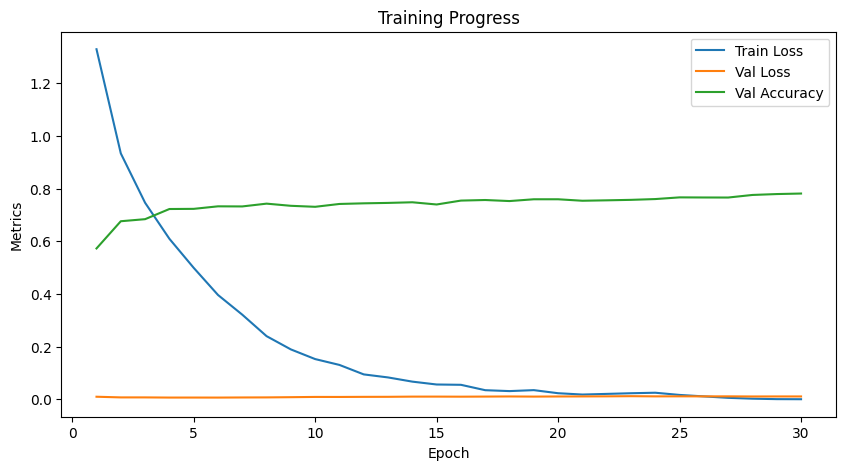

Testing [Test]: 100%|█████████████████████████████████| 79/79 [00:02<00:00, 31.98it/s, test_acc=77.7, test_loss=0.0111]


In [3]:
model = ResNet(input_channels=3, output_size=10)
trainer = CIFAR10Trainer(model, loss='CE', lr=0.01, optimizer='SGD', batch_size=128, epoch=30, model_type='classification')
trainer.train()
trainer.test()

Files already downloaded and verified
Files already downloaded and verified
2024-05-21 22:15:35
Epoch 1 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 33.29it/s, val_acc=23.6, val_loss=0.0249]


2024-05-21 22:15:49
Epoch 2 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 33.80it/s, val_acc=30.8, val_loss=0.0216]


2024-05-21 22:16:04
Epoch 3 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 35.27it/s, val_acc=36.7, val_loss=0.0194]


2024-05-21 22:16:19
Epoch 4 / 30


[Valid]: 100%|█████████████████████████| 40/40 [00:01<00:00, 33.61it/s, val_acc=38, val_loss=0.0193]


2024-05-21 22:16:33
Epoch 5 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 36.49it/s, val_acc=40.3, val_loss=0.0184]


2024-05-21 22:16:48
Epoch 6 / 30


[Valid]: 100%|████████████████████████| 40/40 [00:01<00:00, 35.41it/s, val_acc=42.9, val_loss=0.018]


2024-05-21 22:17:02
Epoch 7 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 34.44it/s, val_acc=41.2, val_loss=0.0195]


2024-05-21 22:17:17
Epoch 8 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 34.74it/s, val_acc=42.8, val_loss=0.0191]


2024-05-21 22:17:32
Epoch 9 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 36.12it/s, val_acc=42.8, val_loss=0.0206]


2024-05-21 22:17:46
Epoch 10 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 35.92it/s, val_acc=42.4, val_loss=0.0218]


2024-05-21 22:18:01
Epoch 11 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 36.22it/s, val_acc=42.4, val_loss=0.0221]


2024-05-21 22:18:15
Epoch 12 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 33.81it/s, val_acc=44.1, val_loss=0.0222]


2024-05-21 22:18:30
Epoch 13 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 34.56it/s, val_acc=45.2, val_loss=0.0221]


2024-05-21 22:18:45
Epoch 14 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 33.75it/s, val_acc=46.6, val_loss=0.0222]


2024-05-21 22:18:59
Epoch 15 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 34.40it/s, val_acc=46.7, val_loss=0.0222]


2024-05-21 22:19:14
Epoch 16 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 32.92it/s, val_acc=46.6, val_loss=0.0224]


2024-05-21 22:19:29
Epoch 17 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 34.71it/s, val_acc=47.3, val_loss=0.0224]


2024-05-21 22:19:44
Epoch 18 / 30


[Valid]: 100%|█████████████████████████| 40/40 [00:01<00:00, 33.10it/s, val_acc=47, val_loss=0.0226]


2024-05-21 22:19:59
Epoch 19 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 34.42it/s, val_acc=46.9, val_loss=0.0226]


2024-05-21 22:20:14
Epoch 20 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 33.76it/s, val_acc=46.9, val_loss=0.0227]


2024-05-21 22:20:29
Epoch 21 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 34.06it/s, val_acc=47.1, val_loss=0.0228]


2024-05-21 22:20:43
Epoch 22 / 30


[Valid]: 100%|████████████████████████| 40/40 [00:01<00:00, 33.22it/s, val_acc=46.6, val_loss=0.023]


2024-05-21 22:20:58
Epoch 23 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 32.72it/s, val_acc=46.9, val_loss=0.0231]


2024-05-21 22:21:13
Epoch 24 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 33.20it/s, val_acc=46.7, val_loss=0.0231]


2024-05-21 22:21:28
Epoch 25 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 33.87it/s, val_acc=47.2, val_loss=0.0231]


2024-05-21 22:21:43
Epoch 26 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 35.05it/s, val_acc=46.6, val_loss=0.0233]


2024-05-21 22:21:57
Epoch 27 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 34.77it/s, val_acc=47.3, val_loss=0.0233]


2024-05-21 22:22:12
Epoch 28 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 34.72it/s, val_acc=47.1, val_loss=0.0233]


2024-05-21 22:22:26
Epoch 29 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 34.58it/s, val_acc=46.9, val_loss=0.0234]


2024-05-21 22:22:41
Epoch 30 / 30


[Valid]: 100%|███████████████████████| 40/40 [00:01<00:00, 32.16it/s, val_acc=47.2, val_loss=0.0236]


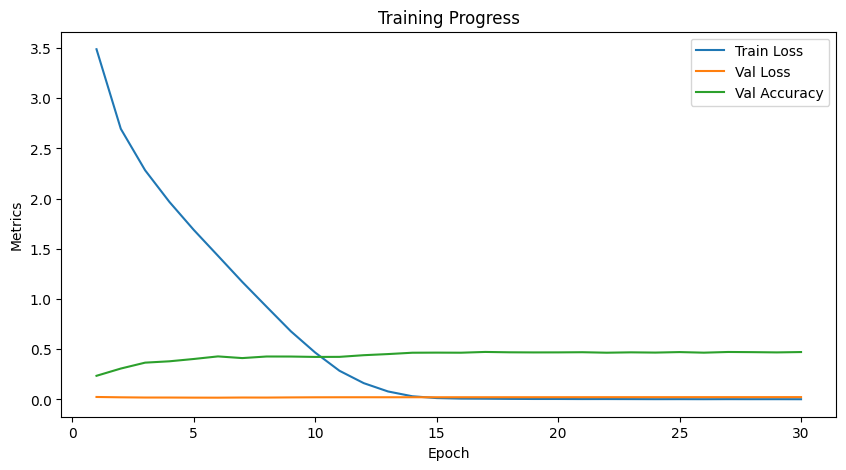

Testing [Test]: 100%|█████████████████████████████████| 79/79 [00:02<00:00, 32.43it/s, test_acc=48.4, test_loss=0.0232]


In [4]:
model_100 = ResNet(input_channels=3, output_size=100)
trainer_100 = CIFAR100Trainer(model_100, loss='CE', lr=0.01, optimizer='SGD', batch_size=128, epoch=30, model_type='classification')
trainer_100.train()
trainer_100.test()